In [51]:
import numpy as np

import theano
import theano.tensor as T
import lasagne

from tqdm import tqdm

import time
from IPython import display

import matplotlib.pyplot as plt

import networkx as nx

In [89]:
with open("../data/ES/ES1_R1_spacers.txt") as f:
    lines = [x[:-2][:31] for x in f.readlines()[1:]]

In [90]:
len(lines)

180518

In [88]:
K_1 = ['CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC', 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG', 
       'GTAGTCCATCATTCCACCTATGTCTGAACTCC', 'CCGGGGGATAATGTTTACGGTCATGCGCCCCC', 
       'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG', 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC',
       'TAGTTTCCGTATCTCCGGATTTATAAAGCTGA', 'GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG', 
       'GCGACCGCTCAGAAATTCCAGACCCGATCCAAA','TCAACATTATCAATTACAACCGACAGGGAGCC', 
       'AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG', 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG']
       
K_2 = ['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC', 'CTGTTTTCGCAAATCTATGGACTATTGCTATT', 
       'GGGCGCACGGAATACAAAGCCGTGTATCTGCT', 'TGGCTCTGCAACAGCAGCACCCATGACCACGT', 
       'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC', 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC']

In [62]:
len(K_1[0])

32

In [71]:
import editdistance as ed
import numpy as np

In [64]:
distances = []

for line in lines:
    distances.append(ed.eval(line, K_1[0][:32]))
distances = np.array(distances)

In [15]:
import matplotlib.pyplot as plt 
import numpy as np

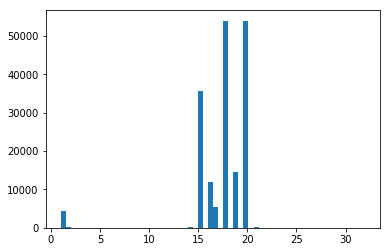

In [16]:
plt.hist(distances, bins=60)
plt.show()

In [47]:
mask = distances < 5

In [48]:
mask.sum()

4667

In [19]:
np.array(lines)[mask]

array(['CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
       'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
       'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG', ...,
       'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
       'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG', 'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG'],
      dtype='<U55')

In [72]:
letter_to_num = {}
letter_to_num['A'] = 0
letter_to_num['C'] = 1
letter_to_num['T'] = 2
letter_to_num['G'] = 3

In [91]:
def compare_spacers(truth, noised, matrix):
    diff = 0
    add_matrix = np.zeros((4,4)).astype(int)
    for t, n in zip(truth, noised):
        add_matrix[letter_to_num[t], letter_to_num[n]] += 1
        if t != n:
            diff += 1 
    if diff < 10:
        matrix += add_matrix

In [74]:
translation_matrix = np.zeros((4, 4)).astype(int)

In [75]:
diffs = []
for spacer in np.array(lines)[mask]:
    compare_spacers(K_1[0][:32], spacer, translation_matrix)


In [76]:
translation_matrix

array([[27891,     2,     5,    62],
       [    2, 41925,    13,     0],
       [    7,    49, 32562,     2],
       [   20,     2,     1, 41915]])

In [95]:
def for_ans_spacer(spacer, lines):
    distances = []

    for line in lines:
        distances.append(ed.eval(line, spacer))
    distances = np.array(distances)
    
    mask = distances < 10
    print(mask.sum())
    plt.hist(distances, bins=10)
    plt.show()
    translation_matrix = np.zeros((4, 4)).astype(int)
    for sp in np.array(lines)[mask]:
        compare_spacers(spacer, sp, translation_matrix)
        
    return translation_matrix, mask.sum(), mask

In [93]:
for_ans_spacer(K_1[0], lines)

4667


(array([[27891,     2,     5,    62],
        [    2, 41925,    13,     0],
        [    7,    49, 32562,     2],
        [   20,     2,     1, 41915]]), 4667)

4667


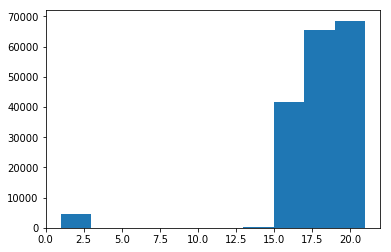

4667
14414


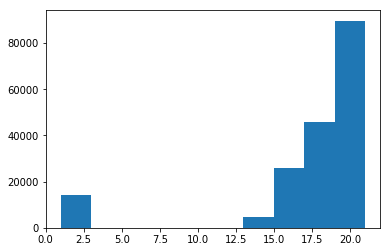

14414
12900


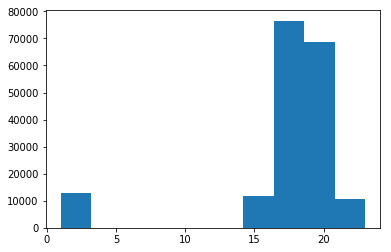

12900
6365


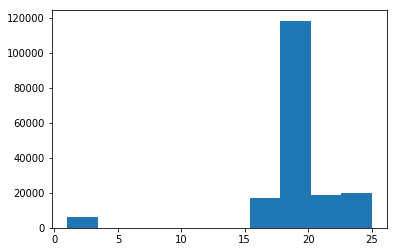

6365
5552


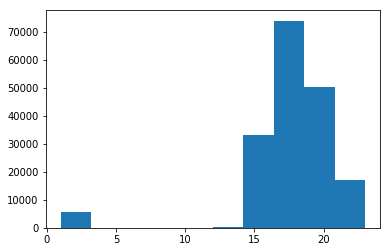

5552
6336


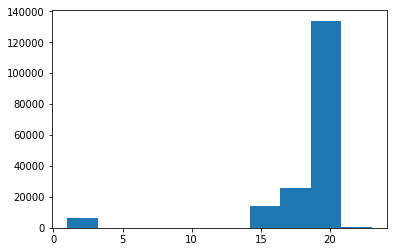

6336
6741


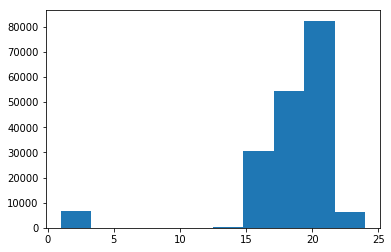

6741
6123


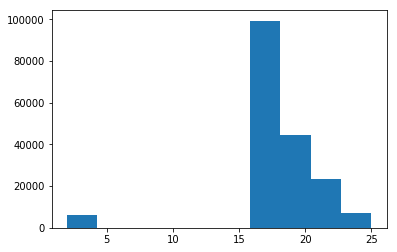

6123
6983


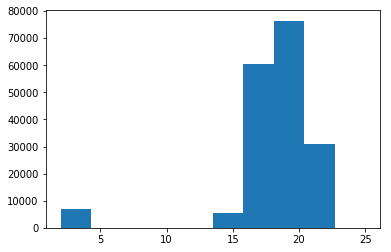

6983
6950


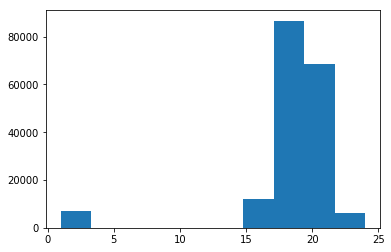

6950
4744


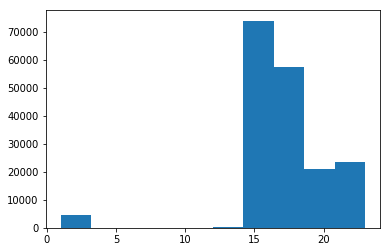

4744
454


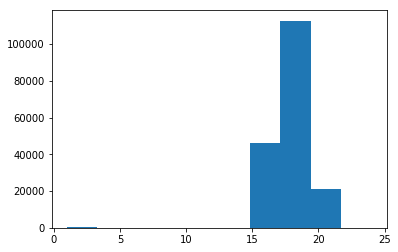

454
11709


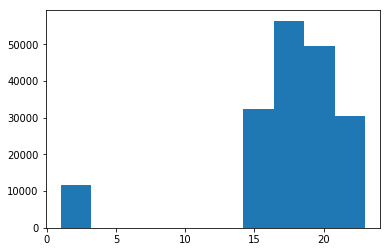

11709
17304


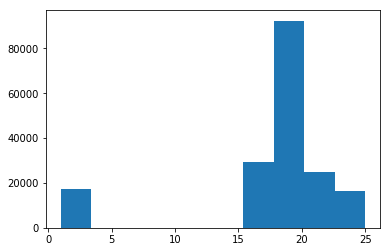

17304
15513


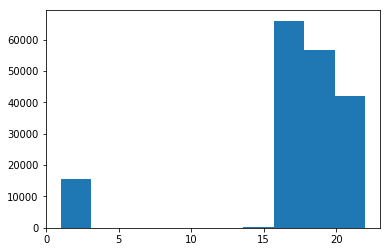

15513
18291


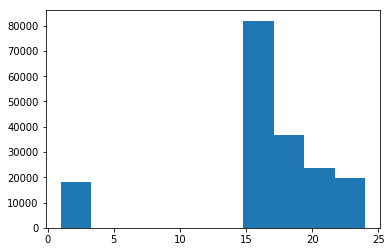

18291
16775


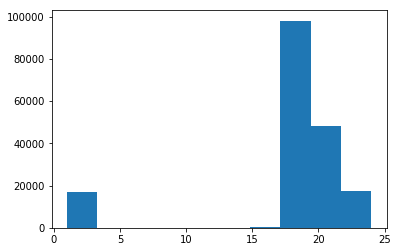

16775
13551


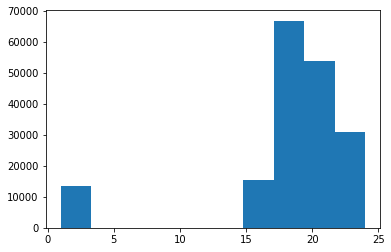

13551


In [107]:
translation_matrix = np.zeros((4, 4)).astype(int)
mask = np.array([False] * len(lines))
all_d = []
for sp in K_1 + K_2:
    t_m, m_s, m = for_ans_spacer(sp, lines)
    mask = np.logical_or(mask, m)
    translation_matrix += t_m
    print(m_s)
    all_d.append(m_s)

In [108]:
all_d

[4667,
 14414,
 12900,
 6365,
 5552,
 6336,
 6741,
 6123,
 6983,
 6950,
 4744,
 454,
 11709,
 17304,
 15513,
 18291,
 16775,
 13551]

In [109]:
sum(all_d)

175372

In [110]:
mask.sum()

175371

In [117]:
len(lines)

180518

In [119]:
np.array(lines)[np.logical_not(mask)]

array(['CAAGTGATATCCATCATCGCATCCAGTGCGC',
       'CAAGTGATATCCATCATCGCATCCAGTGCGC',
       'CAAGTGATATCCATCATCGCATCCAGTGCGC', ...,
       'CAAGTGATATCCATCATCGCATCCAGTGCGC',
       'CAAGTGATATCCATCATCGCATCCAGTGCGC', 'CAAGTGATATCCATCATCGCATCCAGTGCGC'],
      dtype='<U31')

In [120]:
K_1 + K_2

['CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC',
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG',
 'GTAGTCCATCATTCCACCTATGTCTGAACTCC',
 'CCGGGGGATAATGTTTACGGTCATGCGCCCCC',
 'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG',
 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC',
 'TAGTTTCCGTATCTCCGGATTTATAAAGCTGA',
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG',
 'GCGACCGCTCAGAAATTCCAGACCCGATCCAAA',
 'TCAACATTATCAATTACAACCGACAGGGAGCC',
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG',
 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
 'CTGTTTTCGCAAATCTATGGACTATTGCTATT',
 'GGGCGCACGGAATACAAAGCCGTGTATCTGCT',
 'TGGCTCTGCAACAGCAGCACCCATGACCACGT',
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC',
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC']

In [116]:
for l in K_1 + K_2:
    print(ed.eval(l, lines[90]))

16
20
16
17
18
16
18
19
20
16
18
19
16
18
20
17
18
20


In [122]:
sums = translation_matrix.sum(1)

In [123]:
probs = (translation_matrix / sums.reshape(-1,1))

In [141]:
np.save("../switch_probs_ES1", probs)

In [121]:
translation_matrix 

array([[1195100,     233,     292,    2117],
       [    159, 1478768,     921,     110],
       [    350,    2426, 1354804,     228],
       [    808,     114,     148, 1395826]])

In [63]:
translation_matrix.sum(1)

array([523164, 738115, 676395, 621979])

In [64]:
sums

array([523164, 738115, 676395, 621979])

In [68]:
(translation_matrix[0] / 523164)

array([  9.97908878e-01,   1.58650060e-04,   1.70883318e-03,
         2.23639241e-04])

In [124]:
probs[2].sum()

1.0

In [139]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})

In [140]:
print(probs)

[[0.99779 0.00019 0.00024 0.00177]
 [0.00011 0.99920 0.00062 0.00007]
 [0.00026 0.00179 0.99779 0.00017]
 [0.00058 0.00008 0.00011 0.99923]]
